<ipython-input-19-f706321767cf>:23: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  circle = skimage.draw.circle(600, 195, radius=95, shape=image.shape[:2])


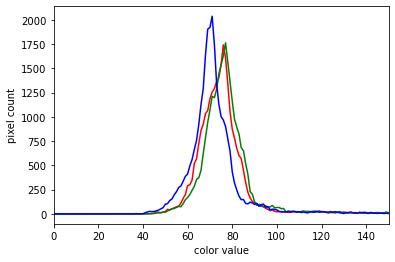

In [19]:
"""
 * Python program to create a color histogram on a masked image.
 *
 * Usage: python ColorHistogramMask.py <filename>
"""
import sys
import skimage.io
import skimage.viewer
import skimage.draw
import numpy as np
from matplotlib import pyplot as plt
filename = 'results_L3.jpg'


# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=filename)


# create a circular mask to select the 7th well in the first row

mask = np.zeros(shape=image.shape[0:2], dtype="bool")
circle = skimage.draw.circle(600, 195, radius=95, shape=image.shape[:2])
mask[circle] = 1

# just for display:
# make a copy of the image, call it masked_image, and
# use np.logical_not() and indexing to apply the mask to it

masked_img = image[:]
masked_img[np.logical_not(mask)] = 0


dot = filename.index(".")
binary_file_name = filename[:dot] + "-masked" + filename[dot:]
skimage.io.imsave(fname=binary_file_name, arr=skimage.img_as_ubyte(masked_img))

# list to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 150])
for (channel_id, c) in zip(channel_ids, colors):
    # change this to use your circular mask to apply the histogram
    # operation to the 7th well of the first row

    histogram, bin_edges = np.histogram(
        image[:, :, channel_id][mask], bins=256, range=(0, 256)
    )

    plt.plot(histogram, color=c)

plt.xlabel("color value")
plt.ylabel("pixel count")

plt.show()

In [20]:
histogram

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    1,    3,    1,    2,    1,   13,   20,   26,
         24,   25,   32,   40,   52,   64,  100,  106,  138,  154,  196,
        229,  272,  288,  336,  387,  411,  495,  561,  663,  759,  921,
       1127, 1293, 1637, 1903, 1922, 2037, 1743, 1342, 1130, 1003,  967,
        901,  776,  648,  433,  318,  248,  184,  147,  148,  108,  104,
        121,  113,   97,  109,   79,   96,  101,   68,   76,   42,   49,
         47,   41,   26,   20,   21,   23,   23,   22,   21,   26,   18,
         24,   14,   20,   13,   12,   23,   20,   19,   28,   16,   25,
         21,   19,   13,   25,   16,   23,   18,   12,   11,    4,   14,
         10,   18,   13,   10,    6,   16,   10,   18,    9,    5,   16,
          9,    7,    5,    8,    7,    4,    7,   